Расчет максимально допустимой силы тока кабеля УЭЦН по гост Р 51777-2001

345 КЭСБП 230 3 16 РОССКАТ и СН МНГ 1715
11428 РОССКАТ
727 РОССКАТ П-16 2110


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

Исходные данные

In [2]:

#T - длительно допустимая температура нагрева жил кабеля, C
#Tср - температура окружающей среды

sigmai=400 #удельное сопротивелении изоляции на 1000 м
sigma_liquid=104
sigma_oil=425
sigma_water=1100
sigma_o=750 #материала оболочки
sigma_b=1000 #материала бандажа поверх оболочки
sigma_p=3 #материала подушки под броней
tlong=120 #длительно допустимая температура нагрева жилы
R=1.15 #электрическое сопротивление токопроводящей жилы
d=4.5  #номинальный диаметр токопроводящей жилы, мм
d1=7.5  #номинальный наружный диаметр первого слоя изоляции жилы, мм
d2=7.5  #номинальный наружный диаметр второго слоя изоляции жилы, мм
do=10 #номинальный диаметр оболочки жилы, мм
db=11 #номинальный наружный диаметр бандажа поверх оболочки жилы
Ds=20 #номинальный диаметр по скрутке жил, мм
Dp=12 #номинальный наружный диаметр подушки под броней 
D=30 # максимальный наружный диаметр круглого кабеля
#  максимальные наружные размеры плоского кабеля 
Dtr=120 #внутренний диаметр обсадной трубы скважины
H=12.5 #толщина
B=36 #ширина
alpha=0.0038 #температурный коэффициент электрического сопротивления материала
             #токопроводящей жилы, С-1



Исходные фунции

In [3]:
def s_c(sigmai,dn,Ds,d):
    #dn - наружный диаметр основной жилы под подушкой, мм, численно равный
    # d1, d2, do или db в зависимости от конструкции кабеля
    result=sigmai/6/3.14*math.log(Ds**3/6.8/dn**2/d)
    return result #тепловое сопротивление кабеля
    
def s_env(D,Dtr,sigma_water=sigma_water,sigma_oil=sigma_oil):
    #Тепловое сопротивление по Б.2.2.1 в скважинной жидкости нефтяной скважины
    result=1/2/3.14*10*(sigma_oil*(1/D+1/Dtr)+sigma_water/D)
    return result

def rt(R,t,alpha): 
    #электрическое сопротивление токопроводящей жилы, Ом
    result=R*(1+alpha*(t-20))
    return result

def calc_i(t,t_env,s_c,s_env,rt): 
    #длительно допустимый ток I, A
    result=((t-t_env)*10**5/3/(s_c+s_env)/rt)**(1/2)
    return result

def tmax(s_c,s_env,rt,i,t):
    result=t+3*(s_c+s_env)*rt*i**2/10**5
    return result

class Save_temp_cable_c(object):
    """
    Класс для сохранения значений температуры внутри функции
    temp_fluid, в которой решения выполняются итеративно
    с помощью fsolve()
    """
 
    def __init__(self, init):
        """
        Начальное значение температуры
        """
        self.temp_cable_c = init

    def save(self,value):
        """
        Сохранение вычисленных значений T в класс
        """
        self.temp_fluid_c=value
        
def t_cabel(tf_c,i,rt,s_cable,s_env):
    result = (i**2)*(s_cable+s_env)*rt*3/10**5+tf_c
    return result

def calc_all(tf_c,i):
    #data_temp=Save_temp_cable_c(None) # экземляр класса для хранения вычисленных данных
    delta0=tf_c*0+10 #  начальное приближение
    
    def calc_temp_cable(val_t_cabel1):
        s_c_val=s_c(sigmai,d1,Ds,d)
        s_env_val=s_env(D,Dtr,sigma_water=sigma_water,sigma_oil=sigma_oil)
        rt_val=rt(R,val_t_cabel1,alpha)
        val_t_cabel2=t_cabel(tf_c,i,rt_val,s_c_val,s_env_val)
        #data_temp.save((val_t_cabel2))  # сохранения в экземляр значений температуры       
        return val_t_cabel2-val_t_cabel1
    result=fsolve(calc_temp_cable,delta0) # находит такое val_t_cabel1, при котором calc_temp_cable = 0
    return result 
    #return data_temp.temp_cable_c


In [4]:

print(calc_all(90,20))

[92.09569229]


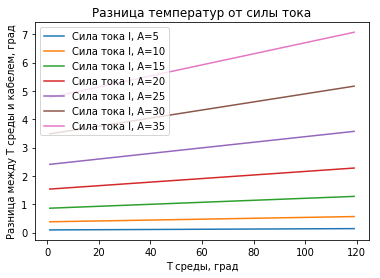

In [5]:

x=np.arange(1,120)
i_val=x*0+20
y=calc_all(x,i_val)
delta_t=y-x
leg=[]
for k in range(5,40,5):
    i_val=x*0+k
    legg='Сила тока I, A='+str(k)
    leg.append(legg)
    y=calc_all(x,i_val)
    delta_t=y-x
    plt.plot(x,delta_t)
leg=tuple(leg)
plt.legend(leg)
plt.xlabel('T среды, град')
plt.ylabel('Разница между T среды и кабелем, град')
plt.title('Разница температур от силы тока')
plt.show() 


Расчет допустимого тока и обратный расчет допустимой температуры нагрева жил кабеля

In [6]:

t_fluid=90

s_c_val=s_c(sigmai,d1,Ds,d)
s_env_val=s_env(D,Dtr,sigma_water=sigma_water,sigma_oil=sigma_oil)
rt_val=rt(R,120,alpha)
i_val=calc_i(tlong,t_fluid,s_c_val,s_env_val,rt_val)
print(i_val)
print(calc_all(t_fluid,i_val))

72.70526088759826
[120.]


## Применение
Зависимость длительно допустимого тока от температуры среды при данных условиях

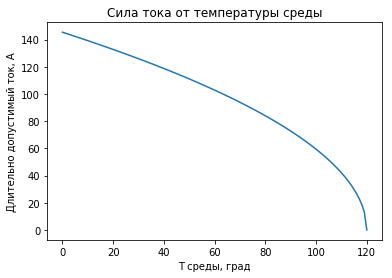

In [7]:
x=[]
y=[]
s_c_val=s_c(sigmai,d1,Ds,d)
s_env_val=s_env(D,Dtr,sigma_water=sigma_water,sigma_oil=sigma_oil)
for k in range(121):
    x.append(k)
    rt_val=rt(R,120,alpha)
    i_val=calc_i(tlong,k,s_c_val,s_env_val,rt_val)
    y.append(i_val)

plt.plot(x,y,label='Сила тока от температуры среды')
plt.xlabel('T среды, град')
plt.ylabel('Длительно допустимый ток, А')
plt.title('Сила тока от температуры среды')
plt.show()    

    
    

## Температура кабеля от температуры среды при данном токе 